# Problem Statement

Insurance premiums are often based on various factors that in the end decide the amount that will be covered from the insurance company. As a data analyst/scientist you are given a set of historical data for an organizations customers and the respective charges that were levied upon the insurance company.

The objective of proposed work is to predict the insurance charges of a person. Build a model that will best predict the insurance charges for a new set of customers. The model will be useful for insurance companies to determine the yearly insurance premium charges for a person.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\ARNAB\IITMadras_Data Sc. & AI\data sets\data sets\new_insurance_data.csv")
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


# Performing EDA

In [3]:
df.shape

(1338, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [5]:
df.describe(include = "all")

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
count,1329.000000,1338,1335.000000,1333.000000,1338,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338,1338.000000
unique,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,male,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,southeast,NaN
freq,NaN,676,NaN,NaN,1064,NaN,NaN,NaN,NaN,NaN,NaN,364,NaN
mean,39.310008,NaN,30.665112,1.090773,NaN,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,NaN,13270.422265
std,14.034818,NaN,6.101690,1.201856,NaN,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,NaN,1121.873900
25%,27.000000,NaN,26.302500,0.000000,NaN,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,NaN,9382.033000
75%,51.000000,NaN,34.687500,2.000000,NaN,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,NaN,16639.912515


In [6]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [7]:
df.columns[:-1]

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region'],
      dtype='object')

In [8]:
col = list(df.columns[:-1])
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region']

In [9]:
for i in col:
    if df[i].dtypes == "object":
        df[i] = df[i].fillna(df[i].mode()[0])
    else:
        df[i] = df[i].fillna(df[i].mean())

In [10]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

performing some visualization:

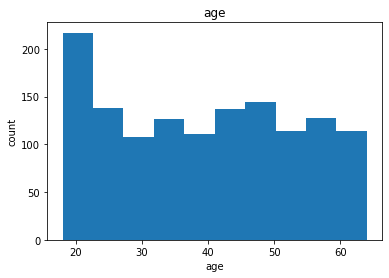

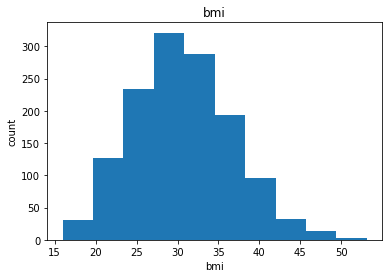

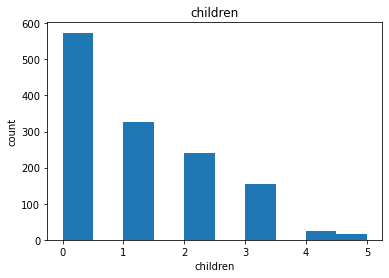

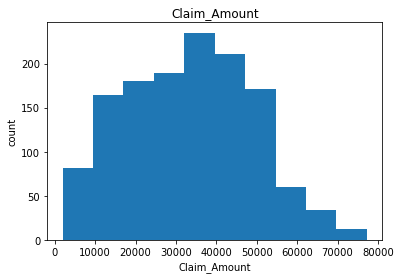

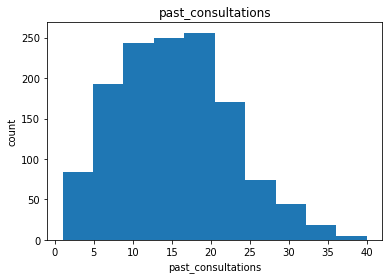

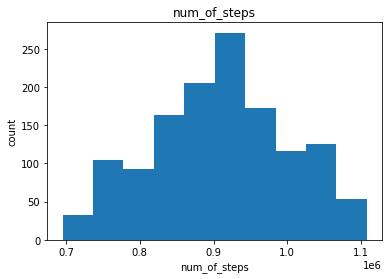

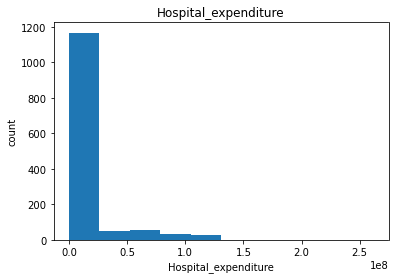

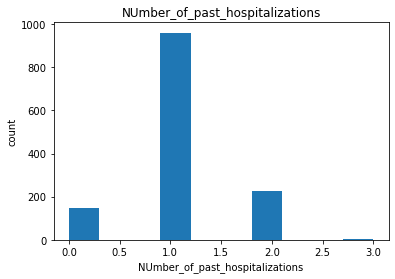

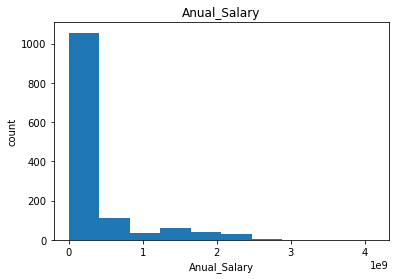

In [11]:
for i in col:
    if df[i].dtypes == "int64" or df[i].dtypes == "float64":
        plt.hist(df[i])
        plt.xlabel(i)
        plt.ylabel("count")
        plt.title(i)
        plt.show()

Checking for outliers:

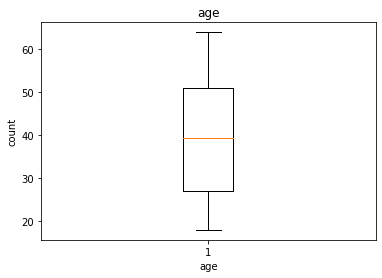

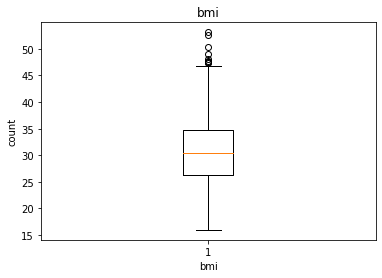

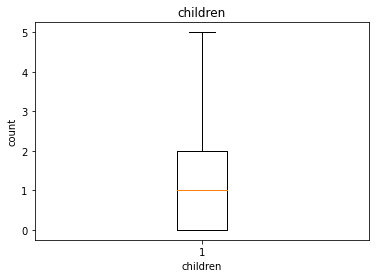

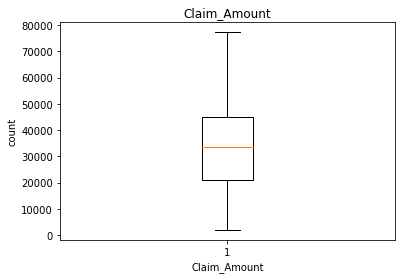

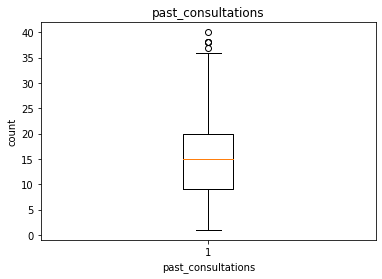

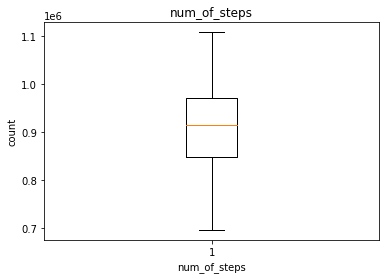

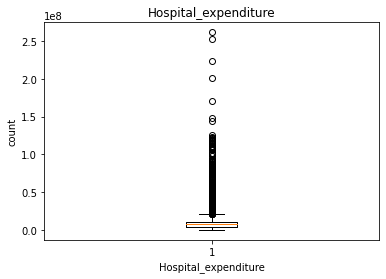

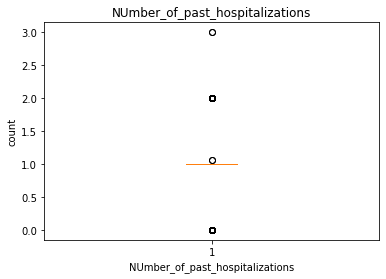

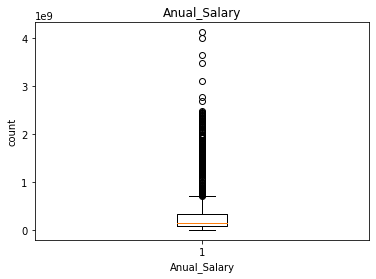

In [12]:
for i in col:
    if df[i].dtypes == "int64" or df[i].dtypes == "float64":
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel("count")
        plt.title(i)
        plt.show()

Treating the outliers:

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                                2.400000e+01
bmi                                8.341250e+00
children                           2.000000e+00
Claim_Amount                       2.403123e+04
past_consultations                 1.100000e+01
num_of_steps                       1.240202e+05
Hospital_expenditure               6.816929e+06
NUmber_of_past_hospitalizations    0.000000e+00
Anual_Salary                       2.523204e+08
charges                            1.189963e+04
dtype: float64


In [14]:
df1= df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis = 1)]
df1.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13728\1926411864.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1= df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis = 1)]


,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,male,27.550,0.0,no,39148.95495,10.0,780652.0,8.614147e+06,1.0,54526009.33,northwest,2523.16950
152,22.0,female,20.235,0.0,no,41547.52536,13.0,802627.0,2.491594e+05,1.0,16718473.13,northwest,2527.81865
153,25.0,male,35.625,0.0,no,39660.60193,12.0,770773.0,3.043323e+06,1.0,48526941.68,northwest,2534.39375
154,20.0,male,31.130,2.0,no,16032.87148,7.0,769255.0,1.599069e+06,1.0,24412621.85,southeast,2566.47070
155,21.0,female,17.400,1.0,no,31090.98977,21.0,778769.0,3.015365e+06,1.0,58535788.80,southwest,2585.26900


In [15]:
df1.shape

(952, 13)

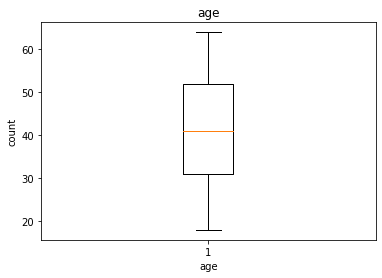

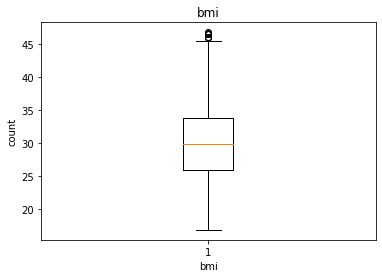

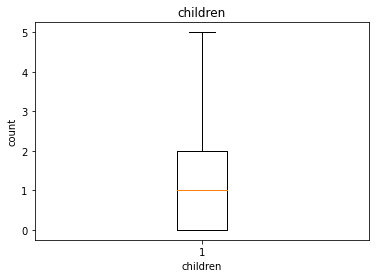

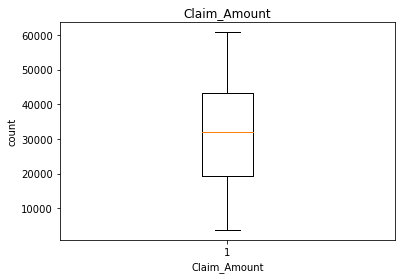

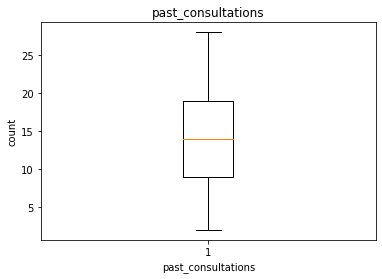

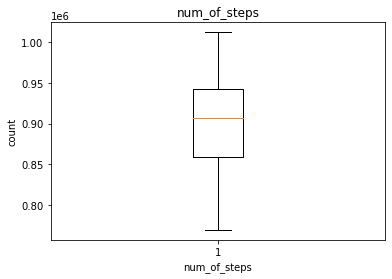

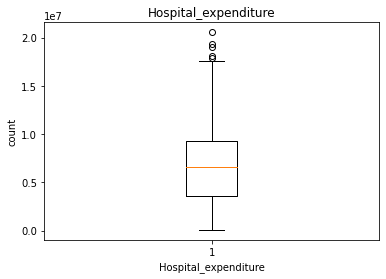

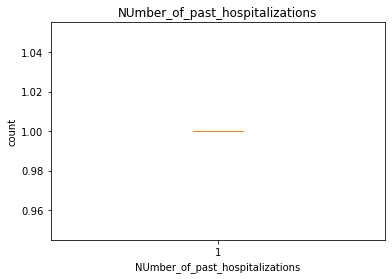

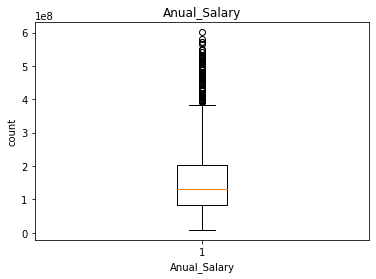

In [16]:
for i in col:
    if df1[i].dtypes == "int64" or df1[i].dtypes == "float64":
        plt.boxplot(df1[i])
        plt.xlabel(i)
        plt.ylabel("count")
        plt.title(i)
        plt.show()

OR we can Treat the outliers seperately:

In [17]:
df2 = df.copy()
df2

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [18]:
q1 = df["bmi"].quantile(0.25)
q3 = df["bmi"].quantile(0.75)
iqr = q3 - q1

df2 = df2[(df2["bmi"] >= (q1 - 1.5*iqr)) & (df2["bmi"] <= (q3 + 1.5*iqr))]


q1 = df["past_consultations"].quantile(0.25)
q3 = df["past_consultations"].quantile(0.75)
iqr = q3 - q1

df2 = df2[(df2["past_consultations"] >= (q1 - 1.5*iqr)) & (df2["past_consultations"] <= (q3 + 1.5*iqr))]


q1 = df["Hospital_expenditure"].quantile(0.25)
q3 = df["Hospital_expenditure"].quantile(0.75)
iqr = q3 - q1

df2 = df2[(df2["Hospital_expenditure"] >= (q1 - 1.5*iqr)) & (df2["Hospital_expenditure"] <= (q3 + 1.5*iqr))]


q1 = df["Anual_Salary"].quantile(0.25)
q3 = df["Anual_Salary"].quantile(0.75)
iqr = q3 - q1

df2 = df2[(df2["Anual_Salary"] >= (q1 - 1.5*iqr)) & (df2["Anual_Salary"] <= (q3 + 1.5*iqr))]

In [19]:
df2.shape

(1126, 13)

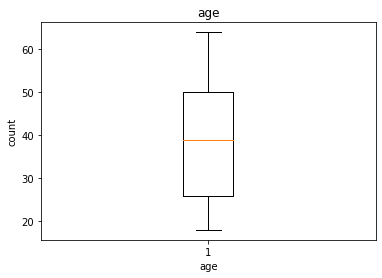

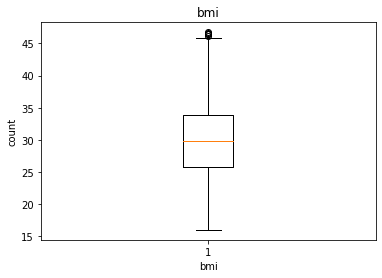

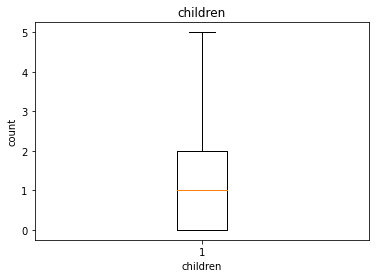

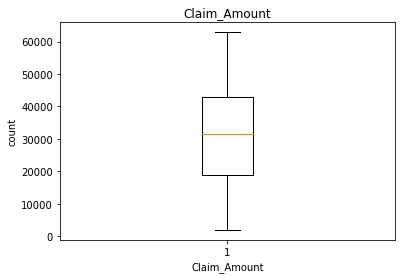

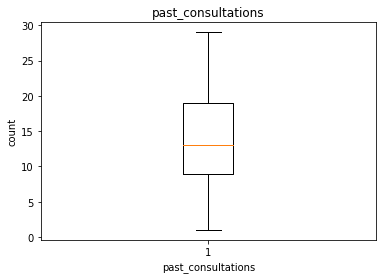

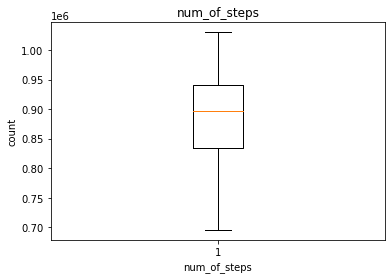

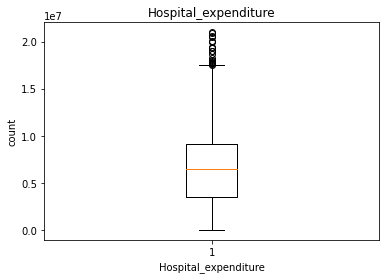

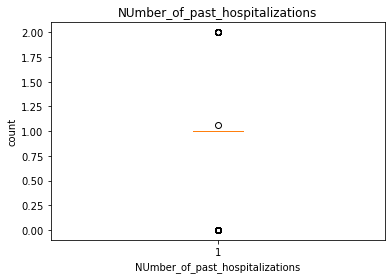

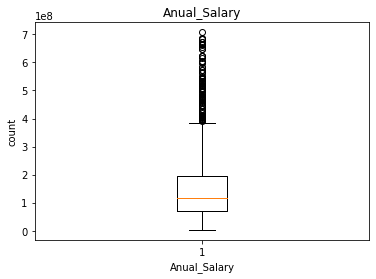

In [20]:
for i in col:
    if df2[i].dtypes == "int64" or df2[i].dtypes == "float64":
        plt.boxplot(df2[i])
        plt.xlabel(i)
        plt.ylabel("count")
        plt.title(i)
        plt.show()

Checking Multicollinearity:

In [23]:
col_list = []
for i in df1.columns:
    if ((df1[i].dtype != "object") & (i != "charges")):
        col_list.append(i)
        
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []
for i in df1.columns:
    if ((df1[i].dtype != "object") & (i != "charges")):
        col_list.append(i)
        
x = df1[col_list]
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF_value"] = [variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
vif_data

,Feature,VIF_value
0,age,2.045459
1,bmi,1.059400
2,children,1.066350
3,Claim_Amount,1.038430
4,past_consultations,1.135877
5,num_of_steps,6.222296
6,Hospital_expenditure,1.543436
7,NUmber_of_past_hospitalizations,1263.453285
8,Anual_Salary,5.132108


In [26]:
df1 = df1.drop(["NUmber_of_past_hospitalizations"], axis = 1)

In [27]:
col_list = []
for i in df1.columns:
    if ((df1[i].dtype != "object") & (i != "charges")):
        col_list.append(i)
        
x = df1[col_list]
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF_value"] = [variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
vif_data

,Feature,VIF_value
0,age,14.796944
1,bmi,27.145090
2,children,2.067037
3,Claim_Amount,5.986880
4,past_consultations,6.814109
5,num_of_steps,59.509266
6,Hospital_expenditure,6.469269
7,Anual_Salary,5.326536


In [28]:
df1 = df1.drop(["num_of_steps"], axis = 1)

In [29]:
col_list = []
for i in df1.columns:
    if ((df1[i].dtype != "object") & (i != "charges")):
        col_list.append(i)
        
x = df1[col_list]
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF_value"] = [variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
vif_data

,Feature,VIF_value
0,age,11.706236
1,bmi,14.646284
2,children,1.947154
3,Claim_Amount,5.427376
4,past_consultations,6.315719
5,Hospital_expenditure,6.190488
6,Anual_Salary,5.114123


In [30]:
df1 = df1.drop(["bmi"], axis = 1)

In [31]:
col_list = []
for i in df1.columns:
    if ((df1[i].dtype != "object") & (i != "charges")):
        col_list.append(i)
        
x = df1[col_list]
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF_value"] = [variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
vif_data

,Feature,VIF_value
0,age,6.975360
1,children,1.829426
2,Claim_Amount,5.004386
3,past_consultations,5.944912
4,Hospital_expenditure,5.845494
5,Anual_Salary,4.906105


In [32]:
df1 = df1.drop(["age"], axis = 1)

In [33]:
col_list = []
for i in df1.columns:
    if ((df1[i].dtype != "object") & (i != "charges")):
        col_list.append(i)
        
x = df1[col_list]
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF_value"] = [variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
vif_data

,Feature,VIF_value
0,children,1.814303
1,Claim_Amount,4.096447
2,past_consultations,5.042835
3,Hospital_expenditure,5.645701
4,Anual_Salary,4.880086


In [34]:
df1 = df1.drop(["Hospital_expenditure"], axis = 1)

In [35]:
col_list = []
for i in df1.columns:
    if ((df1[i].dtype != "object") & (i != "charges")):
        col_list.append(i)
        
x = df1[col_list]
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF_value"] = [variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
vif_data

,Feature,VIF_value
0,children,1.801204
1,Claim_Amount,3.907535
2,past_consultations,4.771541
3,Anual_Salary,3.305035


# Model Building

In [43]:
X = df1.loc[:, ["children", "Claim_Amount", "past_consultations", "Anual_Salary"]]
Y = df1["charges"]

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 45)

In [45]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_train, Y_train)

LinearRegression()

In [50]:
Y_pred = LR_model.predict(X_test)
Y_pred 

array([ 7916.41886843,  8248.90975533, 11554.78794281,  7683.65725415,
        7519.02771336,  8317.99370181, 14836.77132308,  4477.96030694,
        6949.5588583 ,  6787.38635404, 12000.07774889, 16301.21810693,
        5806.01710546,  3766.05483589, 16262.98087176,  8082.70063105,
        9837.29786083,  6099.38925995, 16979.4415739 , 10066.78458128,
       21576.20786457, 11763.52197414,  4928.48354798,  7642.33534415,
       12522.48668243,  5759.80884426, 10147.72041382,  7591.58083907,
        5256.31423724,  7569.80211911,  5208.40726199, 11968.50843306,
       11746.39183971, 10682.45566976,  6959.58193517,  6648.80254969,
       10452.41611352,  6941.60284798,  5316.7915859 , 11884.40842783,
       11322.05272705,  7972.4883641 ,  8889.06252962, 10668.3475973 ,
       12410.03904382, 15670.61341307, 18685.47519612, 16953.8608348 ,
       20653.22967442,  6213.76481438,  8413.92685801,  6892.71478289,
        8426.13256526,  6428.5312254 ,  5973.00232316,  5762.01087124,
      

In [51]:
error_pred = pd.DataFrame()
error_pred["Actual_data"] = Y_test
error_pred["Prediction_data"] = Y_pred
error_pred

,Actual_data,Prediction_data
472,6571.54400,7916.418868
679,9541.69555,8248.909755
778,11085.58680,11554.787943
550,7626.99300,7683.657254
355,4931.64700,7519.027713
...,...,...
1002,16586.49771,15924.568500
881,12629.16560,12490.155383
972,14474.67500,12844.021933
211,3260.19900,5967.730761


Checking the goodness of our model:

In [52]:
from sklearn.metrics import *

accuracy = r2_score(Y_test, Y_pred)
accuracy

0.8865529597035933